In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Tesla.csv')
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
dataset['Date']=pd.to_datetime(dataset.Date)
dataset.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
dataset.drop('Adj Close',axis=1,inplace=True)

In [5]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [6]:
dataset.describe()

,Open,High,Low,Close,Volume
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07


<AxesSubplot: >

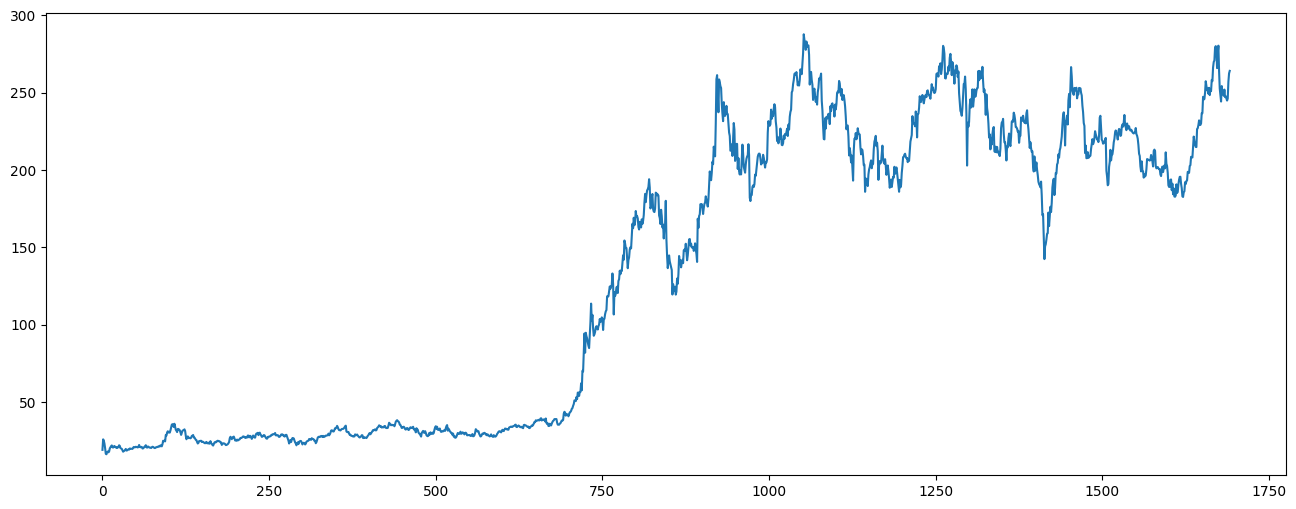

In [7]:
dataset['Open'].plot(figsize=(16,6))

In [8]:
x=dataset[['Open','High','Low','Volume']]
y=dataset['Close']

In [9]:
x.head()

,Open,High,Low,Volume
0,19.000000,25.00,17.540001,18766300
1,25.790001,30.42,23.299999,17187100
2,25.000000,25.92,20.270000,8218800
3,23.000000,23.10,18.709999,5139800
4,20.000000,20.00,15.830000,6866900


In [10]:
y.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Close, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
x_train.shape

(1353, 4)

In [13]:
x_test.shape

(339, 4)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
print(model.coef_)

[-5.54146851e-01  8.57003063e-01  6.95735353e-01 -3.68306761e-08]


In [17]:
model.score

<bound method RegressorMixin.score of LinearRegression()>

In [18]:
predicted=model.predict(x_test)

In [19]:
dfr=pd.DataFrame({"Actual Price":y_test,"Predicted Price":predicted})

In [20]:
dfr

,Actual Price,Predicted Price
1291,243.149994,243.537849
665,38.540001,38.866374
247,27.530001,27.279078
857,122.099998,122.091234
1542,225.610001,225.156422
...,...,...
1592,202.759995,202.643092
1663,257.769989,256.123797
306,24.340000,24.392016
204,25.160000,24.800991


In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
model.score(x_test,y_test)

0.9997707216099114

In [23]:
import math


In [25]:
print("Mean Square Error: ",metrics.mean_squared_error(y_test,predicted))

Mean Square Error 2.0650310910579677


In [27]:
print("Meand Root Square Value: ",math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Meand Root Square Value:  1.4370216042419013


In [29]:
graph=dfr.head(20)

<AxesSubplot: >

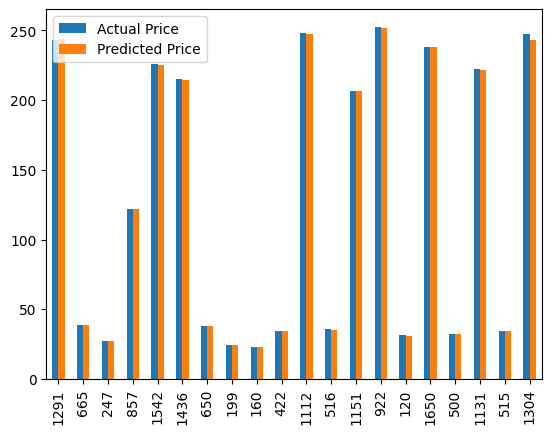

In [30]:
graph.plot(kind='bar')